In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def centers(groups,K,means):
    arr = means
    for i in range(0,K):
        #axis  = 0 - kolumny, axis = 1 - wiersze
        #print groups[i]
        arr[:,i] = np.matrix(1.0/groups[i].shape[1] * np.sum(groups[i],axis = 1))
    return np.matrix(arr)

def create_groups(D,K,means):
    groups = range(0,K)
    D2 = np.sum(np.square(D),axis = 0).T[0]
    means2 = np.sum(np.square(means),axis = 0)
    M = D2+means2 - 2*D.T*means
    indices = np.argmin(M,axis = 1).T
    indices = np.asarray(indices)[0]
    #moze lepiej indices w funckji zrobic??
    #incdices dla kazdego wektora z D zawiera indeks najblizszego mu centrum
    for i in range(0,K):
        groups[i] = D[:,np.where(indices == i)[0]]
    return groups
    
def randomize(n,K):
    a = np.arange(n)
    np.random.shuffle(a)
    return a[:K]
def my_kmeans(K,D):
    #k - liczba grup, D - macierz danych d x n, gdzie n to liczba elementow
    # D jest np.matrix
    n = D.shape[1]
    old_means = []
    groups = []
    randomed = randomize(n,K)
    new_means = np.matrix(D[:,randomed])
    while(not np.array_equal(old_means,new_means)):
        groups = create_groups(D,K,new_means)
        old_means = np.copy(new_means)
        new_means = centers(groups,K,new_means)
    return groups

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
def generate_vector(u_k, E_k):
    d = u_k.shape[0]
    A = np.linalg.cholesky(E_k)
    #print A
    Z = np.matrix(np.random.normal(0,1,d)).T
    #print Z
    return u_k + A * Z

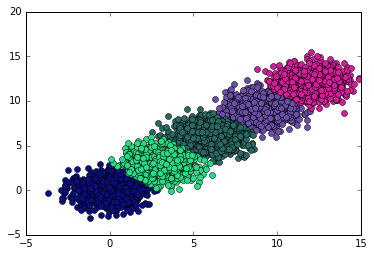

In [3]:
#a
N = 5000
d = 2
K = 5
u = np.matrix(np.zeros((d,K)))
E = range(0,K)
D = np.matrix(np.zeros((d,N)))
for i in range(0,K):
        u[:,i] = 3*i*np.matrix(np.ones((d,1)))
        E[i] = np.matrix(np.eye(d))
for i in range(0,N):
    rand = np.random.randint(0,K,1)[0]
    D[:,i] = generate_vector(u[:,rand],E[rand])
#print D
groups = my_kmeans(K,D)

#print groups[0].shape
for i in range(0,K):
    c = np.random.rand(3,1)
    plt.plot(groups[i][0,:],groups[i][1,:],marker = 'o',color = c)
plt.show()

[[3 0]
 [0 1]]


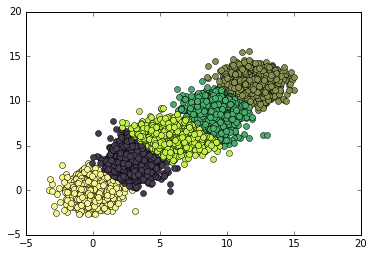

In [4]:
#b
N = 5000
d = 2
K = 5
u = np.matrix(np.zeros((d,K)))
E = range(0,K)
D = np.matrix(np.zeros((d,N)))
for i in range(0,K):
        u[:,i] = 3*i*np.matrix(np.ones((d,1)))
        E[i] = np.matrix(np.eye(d))
E[2] = np.matrix([[3,0],[0,1]])
print E[2]
for i in range(0,N):
    rand = np.random.randint(0,K,1)[0]
    D[:,i] = generate_vector(u[:,rand],E[rand])
#print D
groups = my_kmeans(K,D)

#print groups[0].shape
for i in range(0,K):
    c = np.random.rand(3,1)
    plt.plot(groups[i][0,:],groups[i][1,:],marker = 'o',color = c)
plt.show()

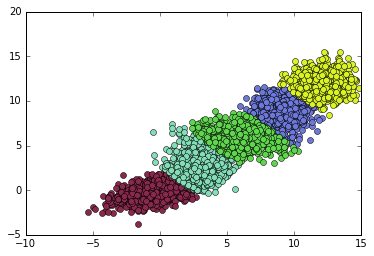

In [5]:
#c
N = 5000
d = 2
K = 5
u = np.matrix(np.zeros((d,K)))
E = range(0,K)
D = np.matrix(np.zeros((d,N)))
for i in range(0,K):
        u[:,i] = 3*i*np.matrix(np.ones((d,1)))
        E[i] = np.matrix(np.eye(d))
E[2] = np.matrix([[3,0],[0,1]])
E[0] = np.matrix([[3,1],[1,1]])
for i in range(0,N):
    rand = np.random.randint(0,K,1)[0]
    D[:,i] = generate_vector(u[:,rand],E[rand])
#print D
groups = my_kmeans(K,D)

#print groups[0].shape
for i in range(0,K):
    c = np.random.rand(3,1)
    plt.plot(groups[i][0,:],groups[i][1,:],marker = 'o',color = c)
plt.show()

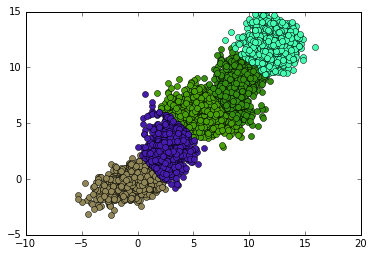

In [6]:
#d
N = 5000
d = 2
K = 5
u = np.matrix(np.zeros((d,K)))
E = range(0,K)
D = np.matrix(np.zeros((d,N)))
for i in range(0,K):
        u[:,i] = 3*i*np.matrix(np.ones((d,1)))
        E[i] = np.matrix(np.eye(d))
E[2] = np.matrix([[3,0],[0,1]])
E[0] = np.matrix([[3,1],[1,1]])
for i in range(0,N):
    rand = np.random.choice(K, p= [0.2, 0.1, 0.3, 0.1, 0.3])
    D[:,i] = generate_vector(u[:,rand],E[rand])
#print D
groups = my_kmeans(K,D)

#print groups[0].shape
for i in range(0,K):
    c = np.random.rand(3,1)
    plt.plot(groups[i][0,:],groups[i][1,:],marker = 'o',color = c)
plt.show()

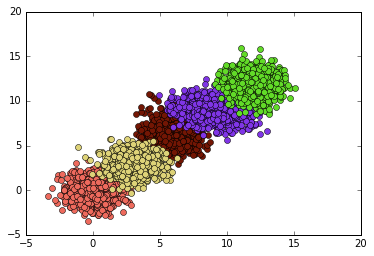

In [7]:
#e
N = 5000
d = 3
K = 5
u = np.matrix(np.zeros((d,K)))
E = range(0,K)
D = np.matrix(np.zeros((d,N)))
for i in range(0,K):
        u[:,i] = 3*i*np.matrix(np.ones((d,1)))
        E[i] = np.matrix(np.eye(d))
E[3] =  np.matrix([[3,1,0],[1,1,0],[0,0,1]])
for i in range(0,N):
    rand = np.random.randint(0,K,1)[0]
    D[:,i] = generate_vector(u[:,rand],E[rand])
#print D
groups = my_kmeans(K,D)

#print groups[0].shape
for i in range(0,K):
    c = np.random.rand(3,1)
    plt.plot(groups[i][0,:],groups[i][2,:],marker = 'o',color = c)
plt.show()

(100, 484)


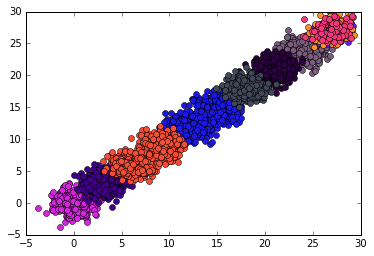

In [8]:
#f
N = 5000
d = 100
K = 10
u = np.matrix(np.zeros((d,K)))
E = range(0,K)
D = np.matrix(np.zeros((d,N)))
for i in range(0,K):
        u[:,i] = 3*i*np.matrix(np.ones((d,1)))
        E[i] = np.matrix(np.eye(d))
for i in range(0,N):
    rand = np.random.randint(0,K,1)[0]
    D[:,i] = generate_vector(u[:,rand],E[rand])
#print D
groups = my_kmeans(K,D)

print groups[0].shape
for i in range(0,K):
    c = np.random.rand(3,1)
    plt.plot(groups[i][72,:],groups[i][31,:],marker = 'o',color = c)
plt.show()

In [1]:
u = np.array([-21,-2,3,5,37,12]).reshape(2,3)

NameError: name 'np' is not defined